# Recurisve Approach + Memoization

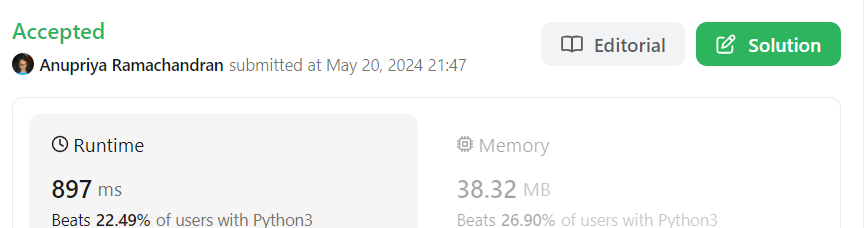

In [1]:
from typing import List
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        buy=True
        dp = [[-1 for _ in range(2)]for _ in range(len(prices))]
        return self.helper(dp, prices, 0, buy, fee)

    def helper(self, dp,  prices, idx, buy, fee):
        if idx > len(prices) - 1:
            return 0
        if dp[idx][buy] == -1:
            if buy:
                c1 = self.helper(dp, prices, idx + 1, not buy, fee) - prices[idx]
                c2 = self.helper(dp, prices, idx + 1, buy, fee)
                dp[idx][buy] =  max(c1, c2)
            else:
                c3 = prices[idx] - fee + self.helper(dp, prices, idx + 1, not buy, fee)
                c4 = self.helper(dp, prices, idx + 1, buy, fee)
                dp[idx][buy] =  max(c3, c4)

        return dp[idx][buy]

# Tabulation
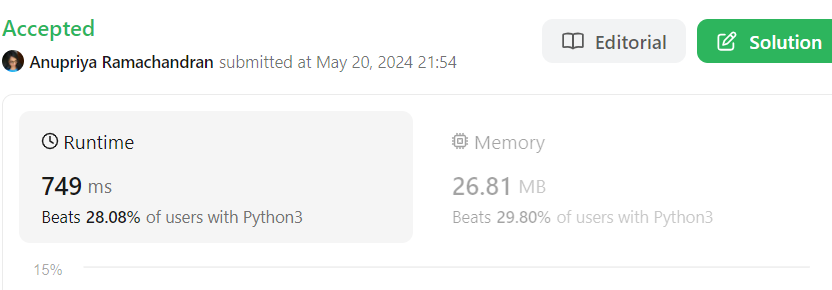

In [2]:
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        n = len(prices)
        dp = [[0 for _ in range(2)]for _ in range(len(prices) + 1)]

        for i in range(n-1, -1, -1):
            for j in range(2):
                if j == 0:
                    dp[i][j] = max(dp[i+1][1] - prices[i],dp[i+1][0])
                else:
                    dp[i][j] = max(prices[i] - fee + dp[i+1][0], dp[i+1][1])
        return dp[0][0]

# Space optmization 

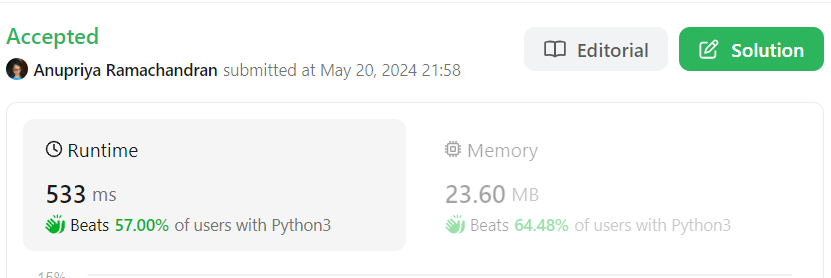

In [3]:
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        n = len(prices)
        front1 = [0] *2
        cur = [0] * 2 

        for i in range(n-1, -1, -1):
            cur[0] = max(front1[1] - prices[i], front1[0])
            cur[1] = max(prices[i] - fee + front1[0], front1[1])
            front1 = cur[:]
        return cur[0]